In [1]:
import pandas as pd

In [24]:
data = pd.read_csv("heart.csv")

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
x = data.drop(["target"], axis=1)
y = data.target

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier()

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [10]:
param_grid = {
    "n_estimators":[10,50,100,200],
    "max_depth":[None, 10,30, 50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [11]:
randomized_search = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5
)

In [37]:
randomized_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 30, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [38]:
randomized_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [39]:
model = randomized_search.best_estimator_

In [40]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
pred = model.predict(x_test)

In [42]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
score = accuracy_score(y_test, pred)
score *100

98.53658536585365

In [45]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)
ans2 = model2.predict(x_test)
print(accuracy_score(y_test, ans2)*100)

78.53658536585367


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
report2 = classification_report(y_test, ans2)
print(report)
print(report2)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [55]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, ans2)
print(matrix)

[[71 31]
 [13 90]]


In [56]:
len(y_test)

205

<Axes: >

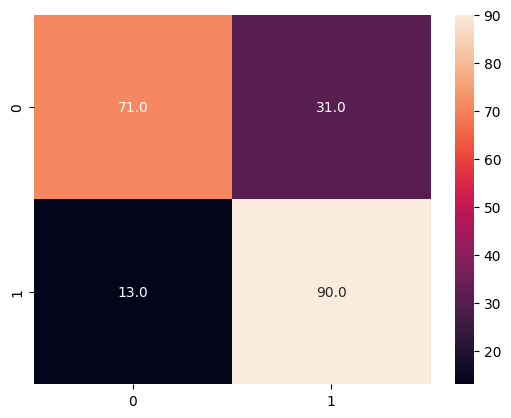

In [57]:
import seaborn as sns

sns.heatmap(matrix, fmt=".1f", annot=True)